In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.grid_tools as gt
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg
import scipy.optimize as sopt
%config InlineBackend.figure_formats = ['svg']
import numba as nb
import time
import scipy.sparse as sspa
import json

In [55]:
import cigre_eu_mv_lab

In [61]:
data_input = 'cigre_eu_mv_lab.json'
with open(data_input,'r') as fobj:
    data = json.loads(fobj.read().replace("'",'"'))
    

grid = cigre_eu_mv_lab.cigre_eu_mv_lab_class()
grid.ini({'P_N14':-100e3},xy_0='xy_0_2.json')
grid.report_y()

V_N00 =  1.00
theta_N00 = -0.00
V_N02 =  1.00
theta_N02 = -0.00
V_N03 =  1.00
theta_N03 = -0.00
V_N04 =  1.00
theta_N04 = -0.00
V_N05 =  1.00
theta_N05 = -0.00
V_N06 =  1.00
theta_N06 = -0.00
V_N07 =  1.00
theta_N07 = -0.00
V_N08 =  1.00
theta_N08 = -0.00
V_N09 =  1.00
theta_N09 = -0.00
V_N10 =  1.00
theta_N10 = -0.00
V_N11 =  1.00
theta_N11 = -0.00
V_N13 =  0.98
theta_N13 = -0.04
V_N14 =  0.98
theta_N14 = -0.05
i_d_N00 =  0.00
i_q_N00 =  0.00
p_g_N00 =  0.00
q_g_N00 =  0.00
v_f_N00 =  1.00
p_m_ref_N00 =  0.00
p_m_N00 =  0.00
z_wo_N00 =  0.00
v_pss_N00 =  0.00
omega_coi =  1.00
p_agc = -4989.80


In [86]:
grid.eval_preconditioner_ini();
N = 1000
P_N14s = np.random.rand(N)*2e5-1e5
#P_N14s =np.linspace(-200e3,200e3,N)

out = np.zeros(N)
t_0 = time.time()
for it in range(N):
    grid.ini({'P_N14':P_N14s[it]})
    out[it] = grid.get_value('V_N14')
print(time.time()-t_0)
grid.report_y()

0.4468047618865967
V_N00 =  1.00
theta_N00 = -0.00
V_N02 =  1.00
theta_N02 = -0.00
V_N03 =  1.00
theta_N03 = -0.00
V_N04 =  1.00
theta_N04 = -0.00
V_N05 =  1.00
theta_N05 = -0.00
V_N06 =  1.00
theta_N06 = -0.00
V_N07 =  1.00
theta_N07 = -0.00
V_N08 =  1.00
theta_N08 = -0.00
V_N09 =  1.00
theta_N09 = -0.00
V_N10 =  1.00
theta_N10 = -0.00
V_N11 =  1.00
theta_N11 = -0.00
V_N13 =  0.99
theta_N13 = -0.02
V_N14 =  0.99
theta_N14 = -0.02
i_d_N00 =  0.00
i_q_N00 =  0.00
p_g_N00 =  0.00
q_g_N00 =  0.00
v_f_N00 =  1.00
p_m_ref_N00 =  0.00
p_m_N00 =  0.00
z_wo_N00 = -0.00
v_pss_N00 = -0.00
omega_coi =  1.00
p_agc = -4995.51


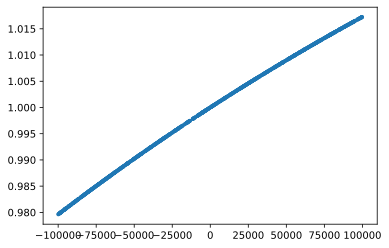

In [85]:
fig,axes = plt.subplots()
axes.plot(P_N14s,out,'.')